In [78]:
pip install scikit-learn        

Note: you may need to restart the kernel to use updated packages.


In [79]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [80]:
pip install catboost

Note: you may need to restart the kernel to use updated packages.


In [81]:
#Basic imports
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
#Modelling
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import seaborn as sns 
import warnings


Import the csv Data file as pandas dataframe

In [82]:
df=pd.read_csv('data\stud.csv')

In [83]:
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


Prepraing X and Y variables

In [84]:
x = df.drop(columns=['math_score'],axis=1)

In [85]:
x.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [86]:
y=df['math_score']

In [87]:
y.head()

0    72
1    69
2    90
3    47
4    76
Name: math_score, dtype: int64

In [88]:
print("categories in 'gender variable:",end='')
print(df['gender'].unique())

print("categories in 'race_ethnicity' variable:",end=" ")
print(df['race_ethnicity'].unique())

categories in 'gender variable:['female' 'male']
categories in 'race_ethnicity' variable: ['group B' 'group C' 'group A' 'group D' 'group E']


Create a column transformer with a 3 type of transformer

In [89]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

num_features = x.select_dtypes(exclude="object").columns
cat_features = x.select_dtypes(include="object").columns

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
[
    ('OneHotEncoder',oh_transformer,cat_features),
    ('StandardScaler',numeric_transformer,num_features),
]
)

In [90]:
x = preprocessor.fit_transform(x)

In [91]:
x

array([[ 1.        ,  0.        ,  0.        , ...,  1.        ,
         0.19399858,  0.39149181],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         1.42747598,  1.31326868],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.77010859,  1.64247471],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.12547206, -0.20107904],
       [ 1.        ,  0.        ,  0.        , ...,  0.        ,
         0.60515772,  0.58901542],
       [ 1.        ,  0.        ,  0.        , ...,  1.        ,
         1.15336989,  1.18158627]])

In [92]:
#Separate dataset into train and test 
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

Create an evaluation function to give all metrices after model Training 

In [93]:
def evaluate_model(true,predicted):
    mae = mean_absolute_error(true,predicted)
    mse = mean_squared_error(true,predicted)
    r2 = r2_score(true,predicted)
    rmse = np.sqrt(mse)

    return mae,rmse,r2

In [94]:
models={
    "Linear Regression": LinearRegression(),
    "Lasso" : Lasso(),
    "Ridge" : Ridge(),
    "K-Neighbors Regressor" : KNeighborsRegressor(),
    "Random forest Regressor" : RandomForestRegressor(),
    "decision Tree Regressor" : DecisionTreeRegressor(),
    "XGBoost Regressor" :XGBRegressor(),
    "CatBoostRegressor" : CatBoostRegressor(),
    "Adaboost Regressor" : AdaBoostRegressor()
}

model_list = []
r2_list =[]

for i in range(len(models)):
    model = list(models.values())[i]
    model.fit(x_train,y_train)

    #Make predictions 
    x_train_pred = model.predict(x_train)
    x_test_pred = model.predict(x_test)

    ##Evaluate Train and Test Dataset 
    model_train_mae,model_train_rmse,model_train_r2 = evaluate_model(y_train,x_train_pred)
    model_test_mae,model_test_rmse,model_test_r2 = evaluate_model(y_test,x_test_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model performance for training set ')
    print("-Root mean squared error is :{:.4f}".format(model_train_rmse))
    print("-Mean absolute error is :{:.4f}".format(model_train_mae))
    print("--R2 Score is :{:.4f}".format(model_train_r2))

    print('---------------------------------')
    
    print("Model performance for testing set")
    print("-Root mean square error is {:.4f}".format(model_test_rmse))
    print("-Mean absolute error is :{:.4f}".format(model_test_mae))
    print("--R2 Score is :{:.4f}".format(model_test_r2))

    r2_list.append(model_test_r2)
    print('='*35)
    print('\n')

Linear Regression
Model performance for training set 
-Root mean squared error is :5.3293
-Mean absolute error is :4.2715
--R2 Score is :0.8740
---------------------------------
Model performance for testing set
-Root mean square error is 5.4252
-Mean absolute error is :4.2222
--R2 Score is :0.8790


Lasso
Model performance for training set 
-Root mean squared error is :6.5938
-Mean absolute error is :5.2063
--R2 Score is :0.8071
---------------------------------
Model performance for testing set
-Root mean square error is 6.5197
-Mean absolute error is :5.1579
--R2 Score is :0.8253


Ridge
Model performance for training set 
-Root mean squared error is :5.3233
-Mean absolute error is :4.2650
--R2 Score is :0.8743
---------------------------------
Model performance for testing set
-Root mean square error is 5.3904
-Mean absolute error is :4.2111
--R2 Score is :0.8806


K-Neighbors Regressor
Model performance for training set 
-Root mean squared error is :5.7079
-Mean absolute error is 

Results

In [95]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model name','R2_Score']).sort_values(by=['R2_Score'],ascending=False)

,Model name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.879046
4,Random forest Regressor,0.851817
7,CatBoostRegressor,0.851632
8,Adaboost Regressor,0.847814
6,XGBoost Regressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.783813
5,decision Tree Regressor,0.750348


Linear Regression

In [96]:
lin_model = LinearRegression(fit_intercept=True)
lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score = r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f" %score)

Accuracy of the model is 87.90


plot y_pred and y_test

Text(0, 0.5, 'Predicted')

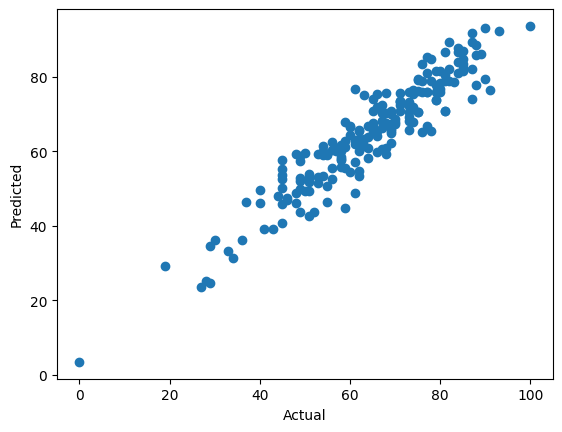

In [97]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')

<Axes: xlabel='math_score'>

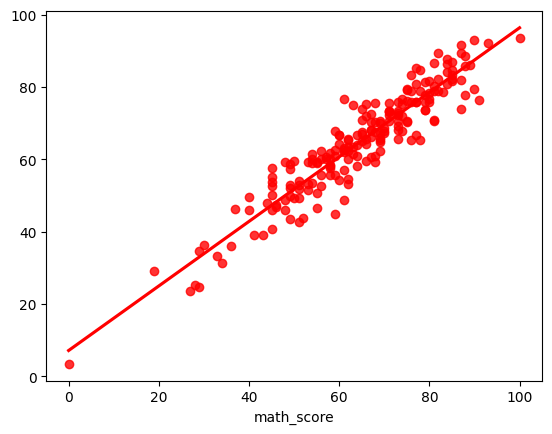

In [98]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='red')

Difference betweein the Actual and Predicted Values

In [99]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test - y_pred})
pred_df

,Actual Value,Predicted Value,Difference
521,91,76.4375,14.5625
737,53,59.3125,-6.3125
740,80,76.6250,3.3750
660,74,76.5625,-2.5625
411,84,87.7500,-3.7500
...,...,...,...
408,52,43.6875,8.3125
332,62,62.3125,-0.3125
208,74,67.7500,6.2500
613,65,67.0000,-2.0000
